In [3]:
#importing yahoofinance data set
import yfinance as yf

In [4]:
#creating instance to ticker class and represent S&P 500 index data as df
df = yf.Ticker("^GSPC")

In [5]:
#getting the historical price as the final data set
df = df.history(period = "max")

In [6]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


In [7]:
df.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-07-31 00:00:00-04:00', '2023-08-01 00:00:00-04:00',
               '2023-08-02 00:00:00-04:00', '2023-08-03 00:00:00-04:00',
               '2023-08-04 00:00:00-04:00', '2023-08-07 00:00:00-04:00',
               '2023-08-08 00:00:00-04:00', '2023-08-09 00:00:00-04:00',
               '2023-08-10 00:00:00-04:00', '2023-08-11 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24018, freq=None)

# Ploting the data in the index

<AxesSubplot:xlabel='Date'>

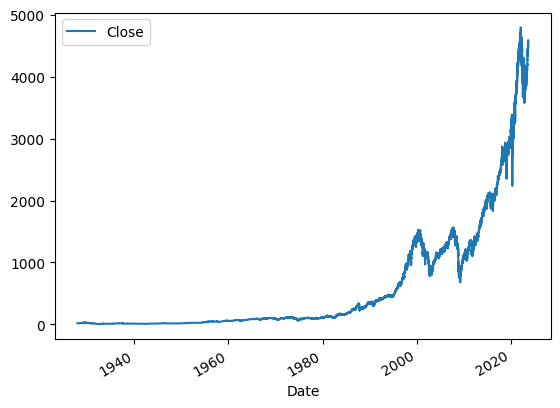

In [8]:
# ploting close as y and date and time as x
df.plot.line(y = 'Close', use_index = True)

# performing data cleaning 
### removing extra colums (dividend
s , stock splits as they are more useful for indivual stocks not for index)

In [10]:
del df["Dividends"]
del df["Stock Splits"]

In [11]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0


# performing machine learning


In [13]:
df["Tomorrow"] = df['Close'].shift(-1)
df.head()

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000


In [15]:
#setting target
df["Target"] = (df["Tomorrow"]>df["Close"]).astype(int)

### Removing data before 1990

In [21]:
df = df.loc["1990-01-01":].copy()
df

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-08-07 00:00:00-04:00,4491.580078,4519.839844,4491.149902,4518.439941,3493920000,4499.379883,0
2023-08-08 00:00:00-04:00,4498.029785,4503.310059,4464.390137,4499.379883,3884910000,4467.709961,0
2023-08-09 00:00:00-04:00,4501.569824,4502.439941,4461.330078,4467.709961,3803100000,4468.830078,1


In [30]:
''' Using RandomForest as it train mulitple individual decision 
    trees with random parameters and averaging the result form those
    decision trees resulting in reducing the overfit problem
    
    and it can even pick non linear corelation between data as well 
''' 
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, min_samples_split=200,random_state=1)

# in time series data such as this we cant use cross validation as it results in overfitting and leakage is gonna happen i.e getting future data ahead and predicting the past data
train = df.iloc[:100]
test = df.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors],train["Target"])

RandomForestClassifier(min_samples_split=200, n_estimators=200, random_state=1)

In [31]:
from sklearn.metrics import precision_score

predictions = model.predict(test[predictors])

In [32]:
import pandas as pd

predictions = pd.Series(predictions, index = test.index)

In [33]:
predictions

Date
2023-03-21 00:00:00-04:00    1
2023-03-22 00:00:00-04:00    1
2023-03-23 00:00:00-04:00    1
2023-03-24 00:00:00-04:00    1
2023-03-27 00:00:00-04:00    1
                            ..
2023-08-07 00:00:00-04:00    1
2023-08-08 00:00:00-04:00    1
2023-08-09 00:00:00-04:00    1
2023-08-10 00:00:00-04:00    1
2023-08-11 00:00:00-04:00    1
Length: 100, dtype: int32

### calculating the precision score

In [37]:
print("accuracy : ",precision_score(test["Target"], predictions))

accuracy :  0.54


In [35]:
combined = pd.concat([test["Target"], predictions],axis=1)

<AxesSubplot:xlabel='Date'>

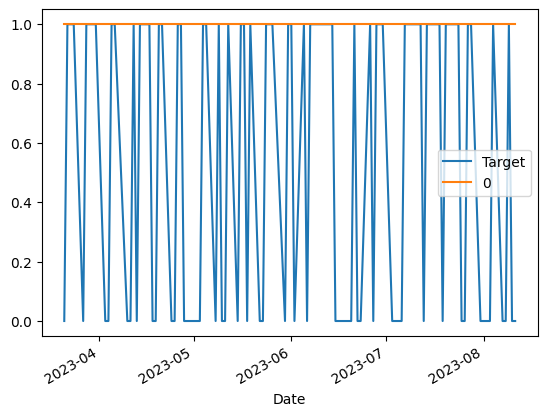

In [29]:
combined.plot()

### Building a backtesting system


In [41]:
def predictions_robust(train, test, predictors, model):
    model.fit(train[predictors],train["Target"])
    predictions = model.predict(test[predictors])
    predictions = pd.Series(predictions, index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"], predictions], axis = 1)
    return combined

In [42]:
def backtest(data, model, predictors, start = 2500, step = 250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predictions_robust(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)
        
    

In [43]:
new_predictions = backtest(df, model, predictors)

In [44]:
new_predictions["Predictions"].value_counts()

0    3079
1    2889
Name: Predictions, dtype: int64

In [45]:
precision_score(new_predictions["Target"], new_predictions["Predictions"])

0.5309795777085496

In [47]:
new_predictions["Target"].value_counts() / new_predictions.shape[0]

1    0.533847
0    0.466153
Name: Target, dtype: float64

### adding additional predictors to our model

In [50]:
# we will calculate the mean closing price in last 2 days , 1 week, 3 months, 1 year, and 4 years
horizons = [2,5,90,250,1000]
new_predictors = []
#finding ratio of todays closing price and the horizons

for horizon in horizons:
    average = df.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    df["ratio_column"] = df['Close']/average["Close"]
    
    trend_column = f"Trend_{horizon}"
    df["trend_column"] = df.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [54]:
df 

,Open,High,Low,Close,Volume,Tomorrow,Target,ratio_column,trend_column
Date,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-08-07 00:00:00-04:00,4491.580078,4519.839844,4491.149902,4518.439941,3493920000,4499.379883,0,1.179718,535.0
2023-08-08 00:00:00-04:00,4498.029785,4503.310059,4464.390137,4499.379883,3884910000,4467.709961,0,1.174248,534.0
2023-08-09 00:00:00-04:00,4501.569824,4502.439941,4461.330078,4467.709961,3803100000,4468.830078,1,1.165513,533.0


In [56]:
#droping the NaN data as it is of no use
df = df.dropna()
df

,Open,High,Low,Close,Volume,Tomorrow,Target,ratio_column,trend_column
Date,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...
2023-08-04 00:00:00-04:00,4513.959961,4540.339844,4474.549805,4478.029785,4143310000,4518.439941,1,1.169678,535.0
2023-08-07 00:00:00-04:00,4491.580078,4519.839844,4491.149902,4518.439941,3493920000,4499.379883,0,1.179718,535.0
2023-08-08 00:00:00-04:00,4498.029785,4503.310059,4464.390137,4499.379883,3884910000,4467.709961,0,1.174248,534.0
